In [3]:
import pandas as pd
data = pd.read_csv("gap.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


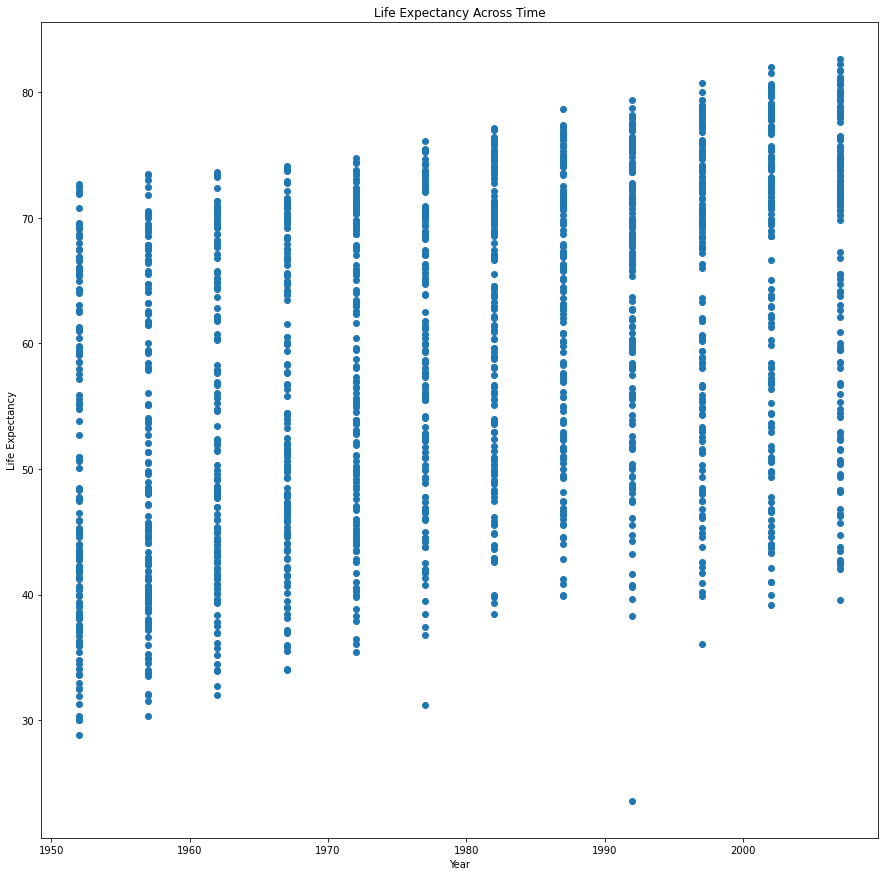

In [4]:
# Exercise 1

import matplotlib.pyplot as plt

#Store the necessary values as the axis
xAxis = data['year']
yAxis = data['lifeExp']

#Increase size of plot
plt.figure(figsize=(15, 15))
plt.scatter(xAxis, yAxis)
#Add labels and title to plot
plt.title("Life Expectancy Across Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")

plt.show()

Code Prose (Exercise 1):

Created a scatter plot using MatPlotLib commands and the provided dataset.

Question 1:

There is a general trend for life expectancy across time, as the life expectancy increases over time between the years 1950 - 2000. The trend is linear since, looking at the scatter plot, the data points are concentrated toward the bottom (40-30 life expectancy in earlier years) then gradually becomes more concentrated towards the top (80-70 life expectancy in later years).

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Life Expectancy'),
 Text(0.5, 1.0, 'Life Expectancy Across Time')]

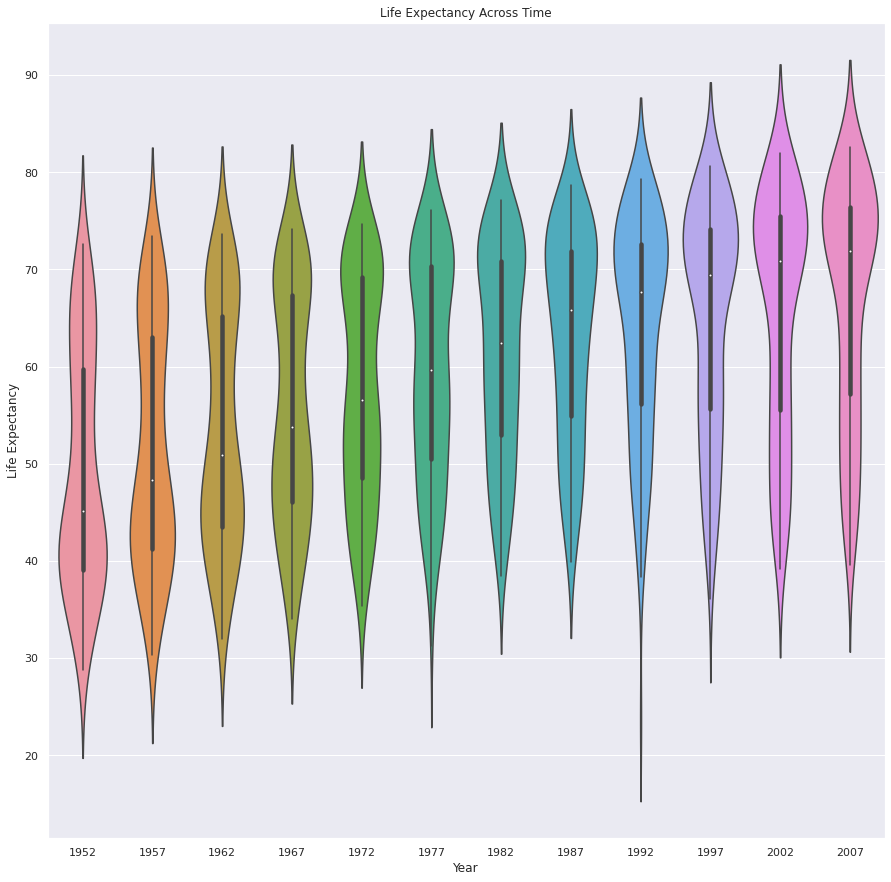

In [5]:
import seaborn as sns

#Increase size of plot
sns.set(rc={'figure.figsize':(15,15)})
#Create a violinplot using seaborn's method and the already loaded in data
ax = sns.violinplot(x=data.year, y=data.lifeExp)
#Add labels
ax.set(xlabel='Year', ylabel='Life Expectancy', title='Life Expectancy Across Time')

Question 2:

The distribution of life expectancy across countries for the years 1952, 1957, 1962, and 1967 are all bottom-heavy. Then as the years past, the distribution of life expectancy becomes top-heavy for the rest of the years (1972 - 2007). The years that are skewed are those with longer "tails" compared to the rest, therefore 1977 & 1992. The years that are unimodal are the violin plots with only one curve, therefore the unimodal years are 1977-2007, while 1952-1972 are bimodal. None of these years are symmetric around its center.

Question 3:

You would reject the null hypothesis of no relationship since there is enough data (from the violin plot) to show that there is a significant relationship between the years and life expectancy.

Question 4:

A violin plot of residuals from the linear model in Question 3 would look linear.

Question 5:

The violin plot would also look linear, similar to Question 4, but will now be centered around 0.

In [7]:
#Exercise 2
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.formula.api as sm

#Format the life expectancy and years into numpy arrays so it can be utilized
x = np.array(xAxis).reshape((-1,1))
y = np.array(yAxis)

#Fit a linear regression model for life expectancy (y) vs year (x)
model = LinearRegression().fit(x, y)

m = model.coef_
b = model.intercept_
print("y =",m,"x +",b)
print("Coefficient:",m)
print("Intercept:",b)

y = [0.32590383] x + -585.6521874415448
Coefficient: [0.32590383]
Intercept: -585.6521874415448


Code Prose (Exercise 2):

Use sklearn to fit a linear regression model on the provided data. Print the slope intercept form.

Question 6:

The life expectancy increases by 0.32590383 every year around the world. This can be seen as the slope (m) in the slope-intercept equation.

In [9]:
#Question 7

result = sm.ols(formula="lifeExp ~ year", data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           7.55e-80
Time:                        04:39:36   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

Question 7:

You reject the null hypothesis of no relationship between the year and life expectancy due to the p-value (under the column P>|t| in the OLS Regression Results) being 0. Since the p-value is 0, that means there is high confidence that there actually is a statistical significance between year and life expectancy, thus the null hypothesis is rejected.

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Residual'),
 Text(0.5, 1.0, 'Residuals VS. Year for Linear Model from Exercise 2')]

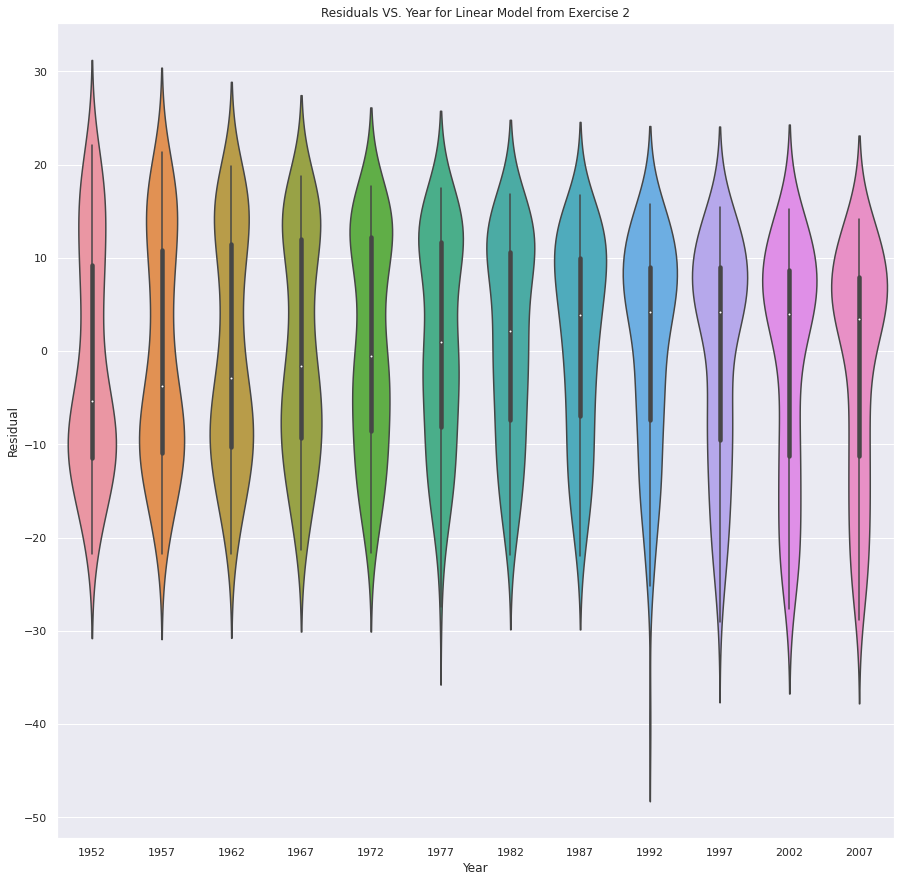

In [10]:
#Exercise 3

#Calculate a column for Residual using the already observed life expectancy and the slope intercept form found in Exercise 2
data['residual'] = data['lifeExp'] - (data['year']*m+b)

#Create a violin plot the same way as the other time
sns.set(rc={'figure.figsize':(15,15)})
ax2 = sns.violinplot(x=data.year, y=data.residual)
ax2.set(xlabel='Year', ylabel='Residual', title='Residuals VS. Year for Linear Model from Exercise 2')

Code Prose (Exercise 3):

Calculate the residual first utilizing the given life expectancy from the data and the predicted life expectancy that is calculated with the slope intercept form. Then simply make a violin plot with residual as the y-axis and years as the x-axis.

Question 8:

The plot of Exercise 3 matches the answer from Question 4, since the violin plot ended up looking linear.

[Text(0.5, 0, 'Continent'),
 Text(0, 0.5, 'Residual'),
 Text(0.5, 1.0, 'Residuals VS. Continent')]

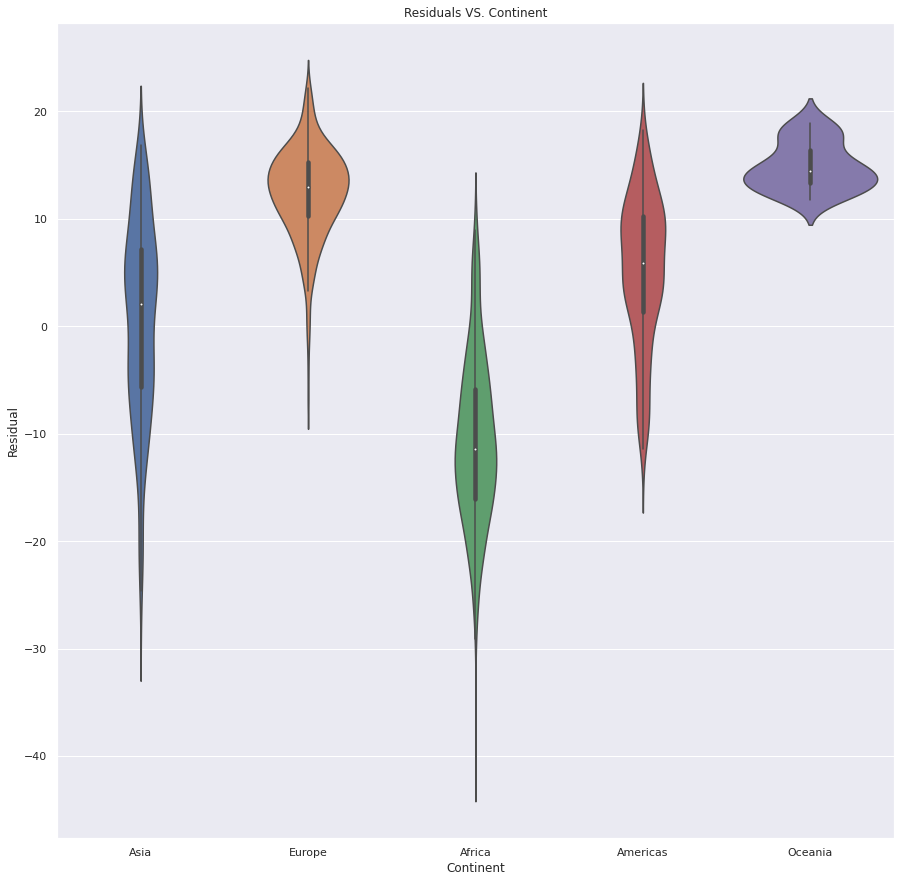

In [11]:
#Exercise 4

#Create a violin plot the same way as the other time
sns.set(rc={'figure.figsize':(15,15)})
ax2 = sns.violinplot(x=data.continent, y=data.residual)
ax2.set(xlabel='Continent', ylabel='Residual', title='Residuals VS. Continent')

Code Prose (Exercise 4):

Just make a violin plot but with "continent" as the x-axis.

Question 9:

There is a dependence between model residual and continent since the varying violin plots are widely different for each continent, whereas in previous violin plots (in earlier Exercises) the shapes were roughly the same with the major differences being median and where data is concentrated. This would suggest that when performing a regression analysis of life expectancy across time would have varying result depending on the continent.

In [12]:
#Exercise 10

#Split up the data by continent for ease of access
split = data.groupby('continent')

africaData = split.get_group('Africa')
americaData = split.get_group('Americas')
asiaData = split.get_group('Asia')
europeData = split.get_group('Europe')
oceaniaData = split.get_group('Oceania')

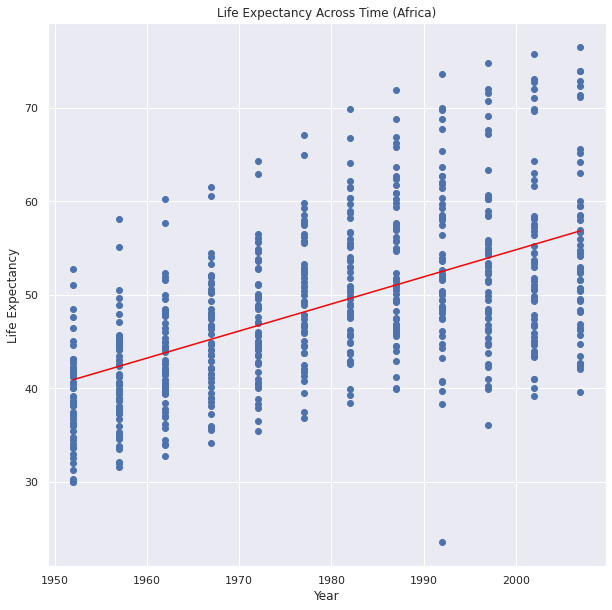

In [13]:
#Exercise 10

#Store the necessary values as the axis
xAxis = africaData['year']
yAxis = africaData['lifeExp']

#Increase size of plot
plt.figure(figsize=(10, 10))
plt.scatter(xAxis, yAxis)
#Add labels and title to plot
plt.title("Life Expectancy Across Time (Africa)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")

#Add line of regression
m, b = np.polyfit(xAxis, yAxis, 1)
plt.plot(xAxis, m*xAxis+b,c = "red")
plt.show()

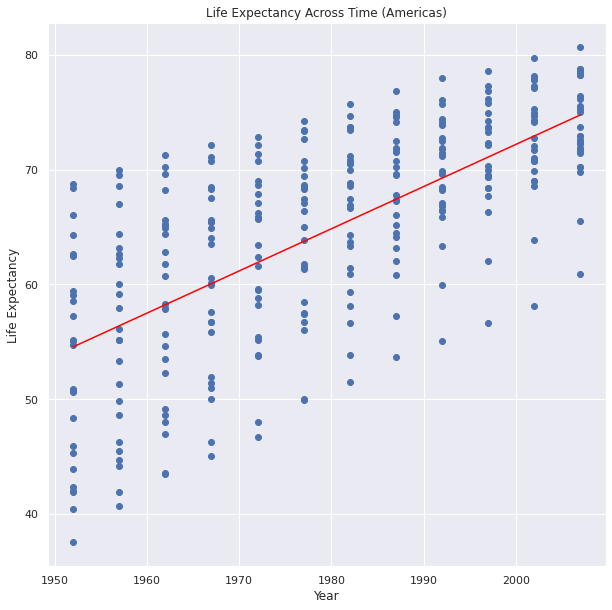

In [14]:
#Exercise 10

#Store the necessary values as the axis
xAxis = americaData['year']
yAxis = americaData['lifeExp']

#Increase size of plot
plt.figure(figsize=(10, 10))
plt.scatter(xAxis, yAxis)
#Add labels and title to plot
plt.title("Life Expectancy Across Time (Americas)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")

#Add line of regression
m, b = np.polyfit(xAxis, yAxis, 1)
plt.plot(xAxis, m*xAxis+b,c = "red")
plt.show()

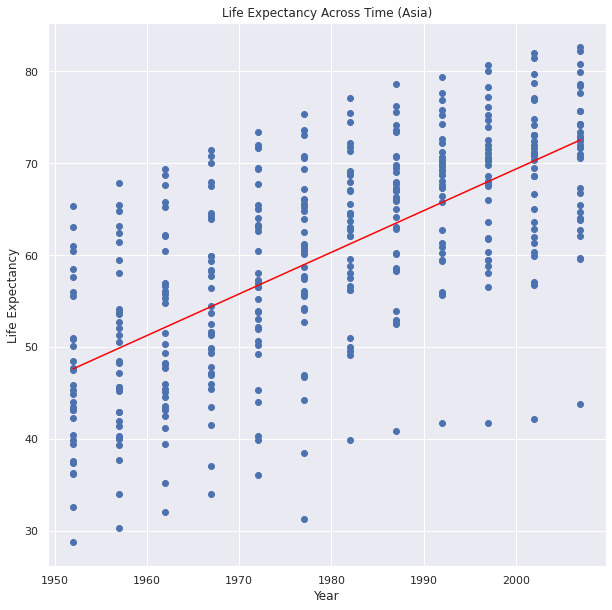

In [15]:
#Exercise 10

#Store the necessary values as the axis
xAxis = asiaData['year']
yAxis = asiaData['lifeExp']

#Increase size of plot
plt.figure(figsize=(10, 10))
plt.scatter(xAxis, yAxis)
#Add labels and title to plot
plt.title("Life Expectancy Across Time (Asia)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")

#Add line of regression
m, b = np.polyfit(xAxis, yAxis, 1)
plt.plot(xAxis, m*xAxis+b,c = "red")
plt.show()

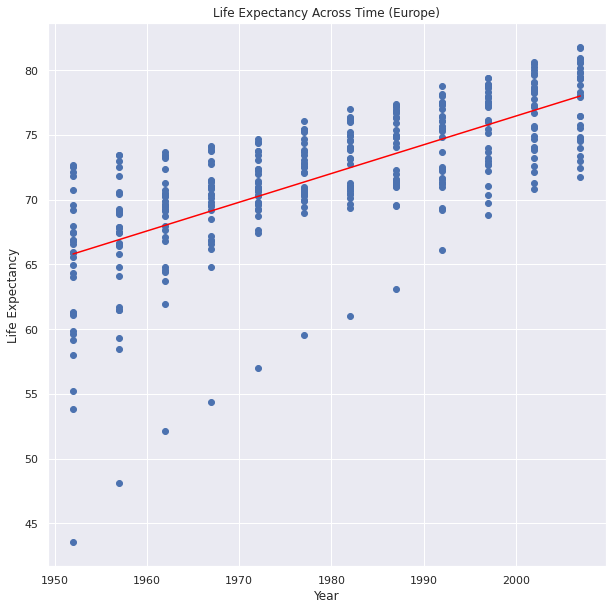

In [16]:
#Exercise 10

#Store the necessary values as the axis
xAxis = europeData['year']
yAxis = europeData['lifeExp']

#Increase size of plot
plt.figure(figsize=(10, 10))
plt.scatter(xAxis, yAxis)
#Add labels and title to plot
plt.title("Life Expectancy Across Time (Europe)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")

#Add line of regression
m, b = np.polyfit(xAxis, yAxis, 1)
plt.plot(xAxis, m*xAxis+b,c = "red")
plt.show()

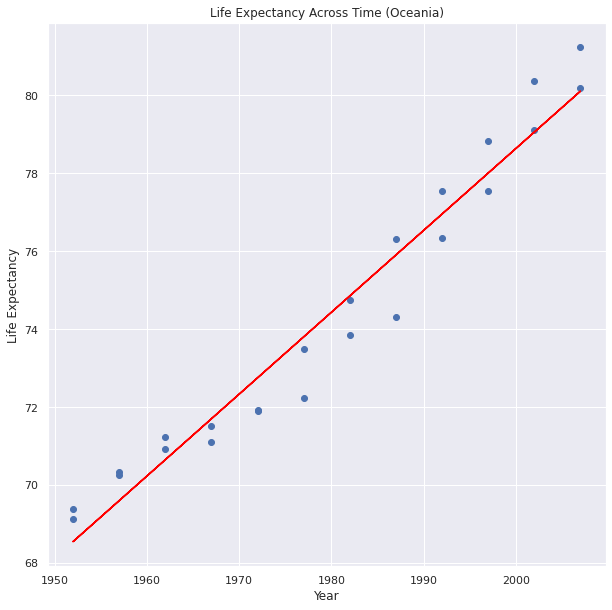

In [17]:
#Exercise 10

#Store the necessary values as the axis
xAxis = oceaniaData['year']
yAxis = oceaniaData['lifeExp']

#Increase size of plot
plt.figure(figsize=(10, 10))
plt.scatter(xAxis, yAxis)
#Add labels and title to plot
plt.title("Life Expectancy Across Time (Oceania)")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")

#Add line of regression
m, b = np.polyfit(xAxis, yAxis, 1)
plt.plot(xAxis, m*xAxis+b,c = "red")
plt.show()

Code Prose (Exercise 10):

First use groupby to split the given data by continent to be able to easily create scatter plots. Then, simply create scatter plots the same way as the previous Exercises. Then, add a line of regression through numpy for each scatterplot.

Question 10:

Based on the plots, you should be including an interaction term for continent and year. This is because depending on the continent, it widely affects how the data output of life expectancy. This can be seen by looking how the regression line differs for each scatter plot. For example, the plot for Africa has a line that slowly rise from its starting point of 40 (life expectancy) to 50. Whereas the plot for Asia has a line comparatively steeper going from ~48 to 65. Having such differences between the line of regression shows that you should be including an interaction term, as the variables continent and year has influences on one another.

In [18]:
#Exercise 6

#Use OLS, but include an interaction term between continent and year with the "*" symbol
exercise6 = sm.ols(formula = 'lifeExp ~ continent * year', data = data).fit()
print(exercise6.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:40:08   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Code Prose (Exercise 6):

Utilizing StatsModel's OLS method, fit a linear regression model for life expectancy, with an interaction term between continent and year (as seen in the formula). Using OLS allows for a printable and readable format as well.

Question 11:

Not all the parameters in the model are significantly different from zero. Looking under the P>|t| column and the rows with year, for the continents Africa (labeled strictly as "year"), America, Asia, and Europe the p-values are pretty close to zero. Whereas for Oceania, the p-value is 0.360, the largest out of all the continents and is the only continent with a parameter significantly different from zero.

In [19]:
#Question 3

#Extract the relevant estimates from model fit
coeff = {'Coefficient':[exercise6.params[5],exercise6.params[6],exercise6.params[7],exercise6.params[8],exercise6.params[9]]}

#Label the estimates and print
df = pd.DataFrame(coeff, index = ["Africa", "Americas", "Asia", "Europe", "Oceania"])
df

,Coefficient
Africa,0.289529
Americas,0.078122
Asia,0.163593
Europe,-0.067597
Oceania,-0.079257


Question 12:

Similar to Question 6, you would look at the "coef" column within the OLS summary. Therefore, on average, life expectancy in Africa increases by 0.289 every year, in America it increases by 0.078, Asia increases by 0.163, Europe decreases by 0.067, and Oceania decreases by 0.079.

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Residual'),
 Text(0.5, 1.0, 'Residuals VS. Year for the Interaction Model')]

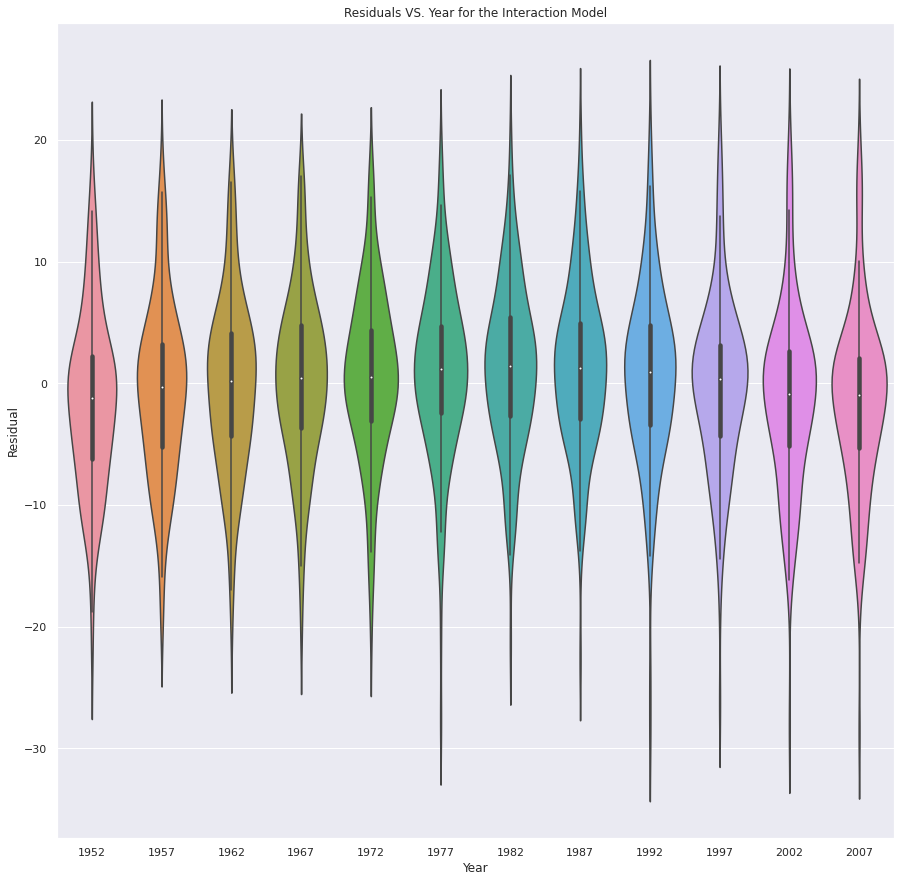

In [20]:
#Exercise 7

#Calculate residual using the model with the interaction term
data['residual_interaction'] = data['lifeExp'] - exercise6.fittedvalues

#Create a violin plot the same way as the other time
sns.set(rc={'figure.figsize':(15,15)})
ax2 = sns.violinplot(x=data.year, y=data.residual_interaction)
ax2.set(xlabel='Year', ylabel='Residual', title='Residuals VS. Year for the Interaction Model')

Code Prose (Exercise 7):

Similar to Exercise 3, calculate the residual for the violin plot, but this time need to use values from the model that has the interaction term. The .fittedvalues method is the predicted life expectancy calculated by the model with the interaction term. Then, create a violin plot with the data.

In terms of how well the produced violin plot matches the assumption of the linear regression model (from Question 5), it matches very well since it is a linear violin plot and all the data points are mostly centered around 0 (residual).

PART 2

Writeup:
The dataset I am using is the Iris plants data from Sklearn. The main attributes of this dataset are the lengths and widths of an iris' sepal and petal (4 attributes in total). The provided dataset has a sample size of 150. The outcome of what this dataset wants to predict is given a length + width of a sepal and petal, what would the species of that iris be (the choices being either Setosa, Versicolor, or Virginica). Since the outcome that is meant to be predicted is classifying a type of Iris, I chose to use Decision Trees and k-NN classification from SKLearn for my algorithms. For the method I use for model selection, I utilized the holdout validation since it would be simple to split the provided data set into a training set and a test set for the two selected algorithms.

Results:
After compiling the iris data from SKLearn into a DataFrame and spitting the data into training and test sets, the holdout validation step was complete and the two algorithms can be conducted on the split data. The performance metric I chose was "accuracy" since I wanted to see how well the two algorithms can determine the species from the given sets. After running a Decision Tree Classification on the sets, the outputted accuracy was 95.55%. While running a k-NN Classification on the sets outputted an accuracy of 97.77%. So between these two algorithms, the k-NN algorithm performs better.


In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics


#Load the iris data
irisData = load_iris()

#From the data, extract features that is needed (X = all of the lengths, target = classifications of sample where 0 --> setosa, 1 --> versicolor, 2 --> virginica)
X = irisData.data
target = irisData.target

#Store the features into a DataFrame
df = pd.DataFrame(X, columns=irisData.feature_names)
df['species'] = target
#Change numerical values of how the dataset classifies sample to the desired prediction output
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])


#Obtain the column names of the features
columns = []
for i in df.columns:
    columns.append(i)
del columns[4]

#Store features in arrays to utilize
xIris = df[columns]
yIris = df['species']

#Split the data into a training set and a test set (the Holdout Validation method). The parameter test_size = 0.3 means 70% of the data is for training, 30% for testing
X_train, X_test, Y_train, Y_test = train_test_split(xIris,yIris, test_size = 0.3, random_state = 1)

In [22]:
#Create the Decision Tree Classifier
clf = DecisionTreeClassifier()
#Train the Decision Tree Classifier with the training set
clf = clf.fit(X_train, Y_train)
#Predict the test set
yPredict = clf.predict(X_test)

[Text(0.4, 0.9, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]\nclass = Virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Setosa'),
 Text(0.5, 0.7, 'petal width (cm) <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]\nclass = Virginica'),
 Text(0.2, 0.5, 'petal length (cm) <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = Versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Versicolor'),
 Text(0.3, 0.3, 'sepal length (cm) <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Versicolor'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Virginica'),
 Text(0.8, 0.5, 'petal length (cm) <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = Virginica'),
 Text(0.7, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Virginica

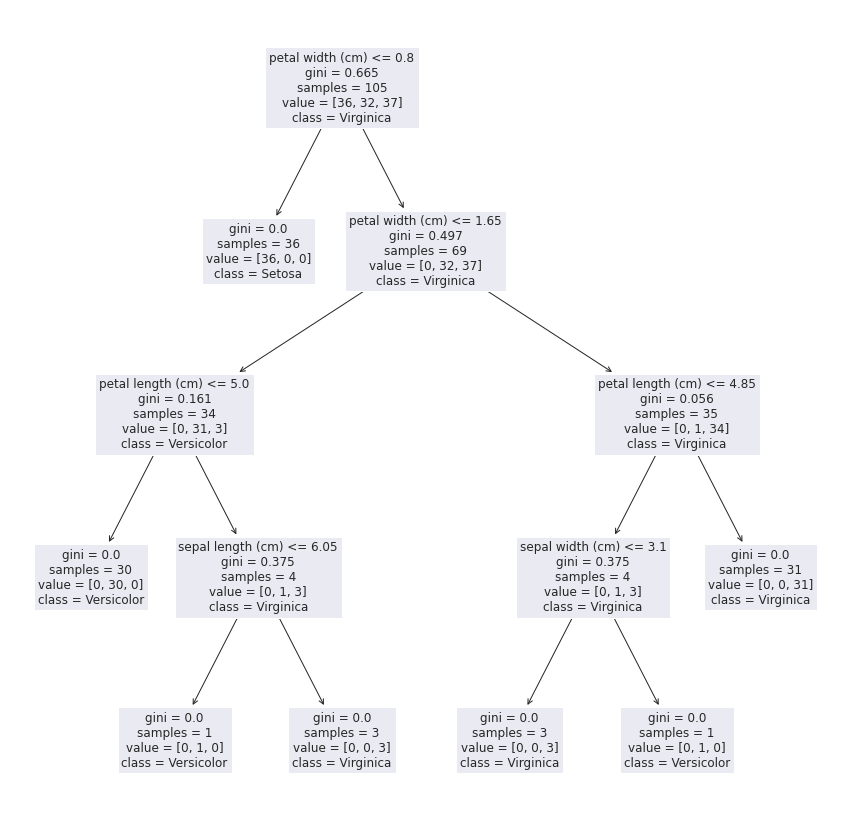

In [23]:
#Print out the Decision Tree
tree.plot_tree(clf, feature_names=columns, class_names=['Setosa', 'Versicolor', 'Virginica'])

In [24]:
#How accurate is the Decision Tree Classifier?
print("Accuracy:",metrics.accuracy_score(Y_test, yPredict))

Accuracy: 0.9555555555555556


In [25]:
from sklearn.neighbors import KNeighborsClassifier

#Conduct k-NN algorithm on the Iris dataset. The number of neighbors was decided by taking the square root of the number of samples provided by the Iris dataset (sqrt(150) is about 12)
knn = KNeighborsClassifier(n_neighbors=12)
#Already compiled the training set / Holdout validation earlier
knn.fit(X_train, Y_train)
#How accurate is the k-NN algorithm
knnPre = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, knnPre))

Accuracy: 0.9777777777777777
